# Customer Churn Prediction

#### Author : Nicodemus Naisau (demsroadmap@gmail.com

<img src="https://s16353.pcdn.co/wp-content/uploads/2018/06/Churn.png" alt="alt text" title="image Title" />

In [17]:
import warnings
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplot
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, jaccard_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

In [18]:
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=Warning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [20]:
telco = pd.read_csv('dqlab_telco_final.csv')
telco.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.850,29.850,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.500,1198.800,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.100,541.900,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.500,8312.750,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.250,4620.400,No


In [21]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [22]:
telco.describe()

,UpdatedAt,customerID,tenure,MonthlyCharges,TotalCharges
count,6950.000,6950.000,6950.000,6950.000,6950.000
mean,202006.000,45498975234.853,32.423,64.992,2286.059
std,0.000,285409137.050,24.581,30.032,2265.703
min,202006.000,45000258625.000,0.000,0.000,19.000
25%,202006.000,45256067521.000,9.000,36.463,406.975
50%,202006.000,45498705615.500,29.000,70.450,1400.850
75%,202006.000,45743844787.500,55.000,89.850,3799.838
max,202006.000,45999585058.000,124.000,169.931,8889.131


### Exploratory Data Analysis

#### Selected Atribute Data inrelevant 

In [23]:
telco.drop(['customerID', 'UpdatedAt'],axis = 1, inplace = True)
telco.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.850,29.850,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.500,1198.800,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.100,541.900,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.500,8312.750,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.250,4620.400,No


In [24]:
#selected atribute data
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#### Distribution Densitify

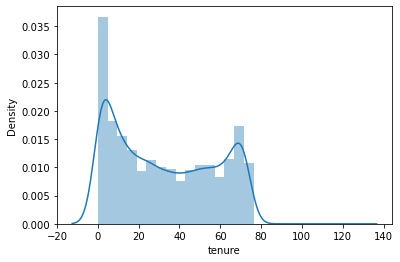

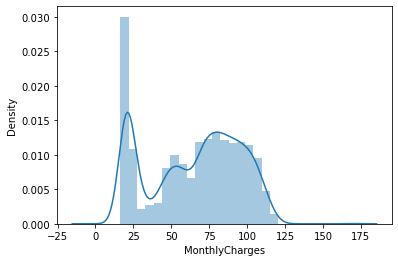

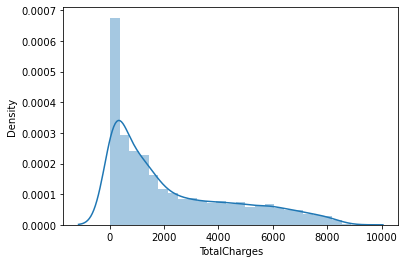

In [25]:
#distribution denstify
for i in num_cols:
    sns.distplot(telco[i])
    plt.show()

#### Heatmap Correlation

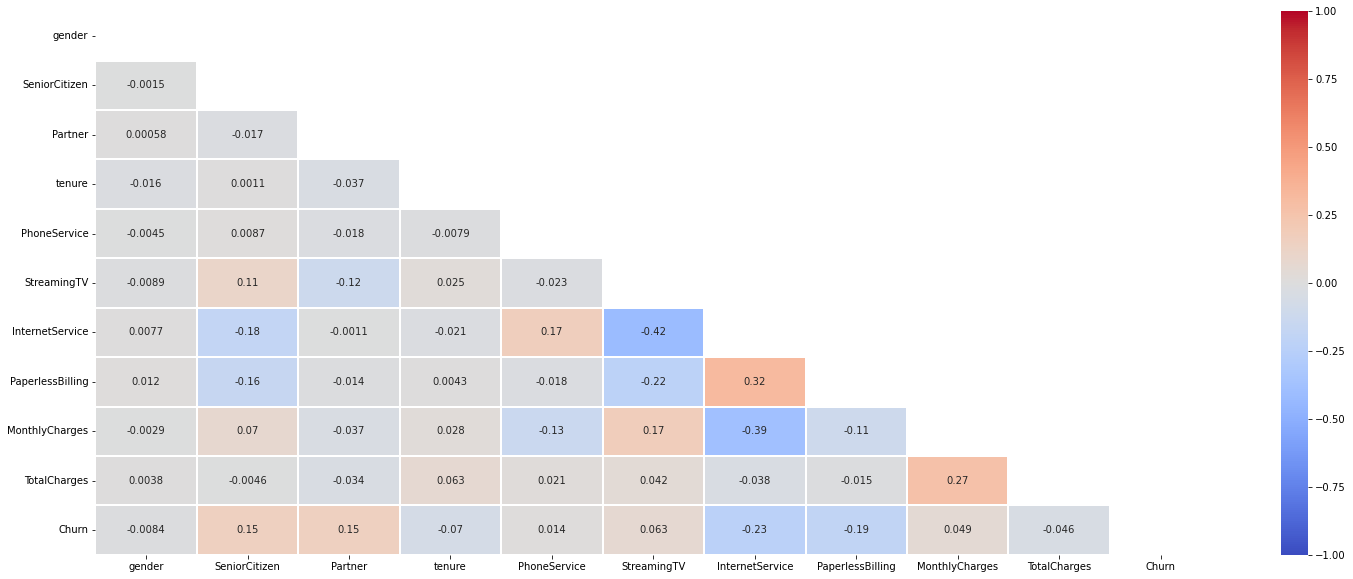

In [26]:
plt.figure(figsize=(25, 10))

corr = telco.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### Encoding

#### One Hot Encoding Caterogical Values

In [27]:
#define categorial 
categorical = telco.select_dtypes('object').columns

In [28]:
def one_hot_encoder(telco, categorical, drop_first=False):
    telco = pd.get_dummies(telco, columns=categorical, drop_first=drop_first)
    return telco

In [29]:
telco_encoder = one_hot_encoder(telco, categorical, drop_first=True)
telco_encoder.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,PhoneService_Yes,StreamingTV_Yes,InternetService_Yes,PaperlessBilling_Yes,Churn_Yes
0,1,29.850,29.850,0,0,1,0,0,1,1,0
1,60,20.500,1198.800,1,0,1,1,0,0,1,0
2,5,104.100,541.900,1,0,0,1,1,1,0,1
3,72,115.500,8312.750,0,0,1,1,1,1,1,0
4,56,81.250,4620.400,0,0,1,1,1,1,0,0


### ML Modeling


In [60]:
X = telco_encoder.drop('Churn_Yes',axis = 1).values
y = telco_encoder['Churn_Yes'].values

#### Spliting Data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 123, stratify = y)

#### K-Nearest Neighbors Algorithm

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4091
           1       0.54      0.39      0.45      1469

    accuracy                           0.75      5560
   macro avg       0.67      0.64      0.65      5560
weighted avg       0.73      0.75      0.74      5560



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

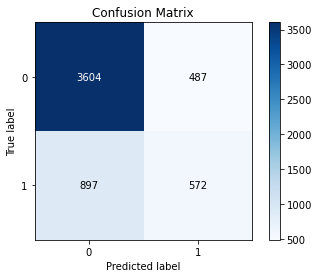

In [63]:
knn = KNeighborsClassifier() ## n_neighbors is 5 by default
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_knn)